In [ ]:
%pip install kaggle
%pip install kagglehub


In [1]:
from google.colab import files
import zipfile

# Upload the file
uploaded = files.upload()

# Extract the uploaded zip
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("dataset")  # extracts to folder named 'dataset'



Saving solar_storm.zip to solar_storm.zip


DATA PREPROCESSING AND RANDOMFOREST MODEL BUILDING


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("dataset/solar_storm_impact_dataset.csv")

# Encode categorical feature
le = LabelEncoder()
df["solar_flare_class"] = le.fit_transform(df["solar_flare_class"])

# Features & Target
X = df.drop("power_grid_disruption", axis=1)
y = df["power_grid_disruption"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(["event_id", "event_date"], axis=1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76  4  0]
 [ 5 84  5]
 [ 0  1 25]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.94      0.89      0.92        94
           2       0.83      0.96      0.89        26

    accuracy                           0.93       200
   macro avg       0.91      0.94      0.92       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
df = pd.read_csv("dataset/solar_storm_impact_dataset.csv")

In [ ]:
df

,event_id,event_date,solar_flare_class,flare_intensity,geomagnetic_index_Kp,solar_wind_speed,solar_wind_density,flare_duration_minutes,power_grid_disruption
0,1,2018-10-01,X,96.25,4,558.43,12.62,10,2
1,2,2020-09-28,M,31.15,0,723.17,6.26,95,1
2,3,2020-03-15,C,23.93,0,626.27,7.81,44,1
3,4,2008-01-11,M,62.66,2,498.49,5.94,136,1
4,5,2022-03-30,M,37.73,0,505.02,18.03,86,1
...,...,...,...,...,...,...,...,...,...
995,996,2002-10-27,M,51.77,2,487.23,10.79,146,1
996,997,2011-02-16,C,20.18,1,552.23,0.44,29,0
997,998,2014-11-03,M,46.29,1,429.57,9.21,24,1
998,999,2000-11-15,M,45.31,1,420.46,15.32,20,1


from matplotlib import pyplot as plt
df['event_id'].plot(kind='hist', bins=20, title='event_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['flare_intensity'].plot(kind='hist', bins=20, title='flare_intensity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['geomagnetic_index_Kp'].plot(kind='hist', bins=20, title='geomagnetic_index_Kp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['solar_wind_speed'].plot(kind='hist', bins=20, title='solar_wind_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('solar_flare_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='event_id', y='flare_intensity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='flare_intensity', y='geomagnetic_index_Kp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='geomagnetic_index_Kp', y='solar_wind_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='solar_wind_speed', y='solar_wind_density', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_id']
  ys = series['flare_intensity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('event_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('solar_flare_class')):
  _plot_series(series, series_name, i)
  fig.legend(title='solar_flare_class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_id')
_ = plt.ylabel('flare_intensity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_id']
  ys = series['geomagnetic_index_Kp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('event_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('solar_flare_class')):
  _plot_series(series, series_name, i)
  fig.legend(title='solar_flare_class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_id')
_ = plt.ylabel('geomagnetic_index_Kp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_id']
  ys = series['solar_wind_speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('event_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('solar_flare_class')):
  _plot_series(series, series_name, i)
  fig.legend(title='solar_flare_class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_id')
_ = plt.ylabel('solar_wind_speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['event_id']
  ys = series['solar_wind_density']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('event_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('solar_flare_class')):
  _plot_series(series, series_name, i)
  fig.legend(title='solar_flare_class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('event_id')
_ = plt.ylabel('solar_wind_density')

from matplotlib import pyplot as plt
df['event_id'].plot(kind='line', figsize=(8, 4), title='event_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['flare_intensity'].plot(kind='line', figsize=(8, 4), title='flare_intensity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['geomagnetic_index_Kp'].plot(kind='line', figsize=(8, 4), title='geomagnetic_index_Kp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['solar_wind_speed'].plot(kind='line', figsize=(8, 4), title='solar_wind_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['solar_flare_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='event_id', y='solar_flare_class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['solar_flare_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='flare_intensity', y='solar_flare_class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['solar_flare_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='geomagnetic_index_Kp', y='solar_flare_class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['solar_flare_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='solar_wind_speed', y='solar_flare_class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

FEATURE IMPORTANCE

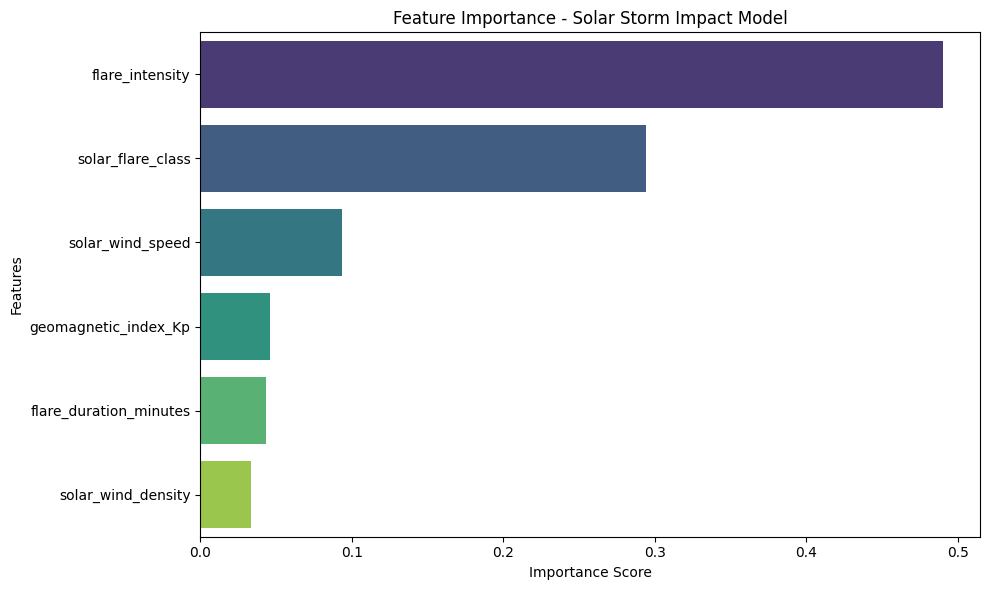

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.drop(["event_id", "event_date"], axis=1).columns

# Sort features
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Solar Storm Impact Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()